In [5]:
import osmnx as ox
import networkx as nx
import numpy as np
from geopy.geocoders import Nominatim
import geopandas as gpd
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import time
import warnings
import plotly.io as pio
pio.renderers.default = "svg"
warnings.filterwarnings("ignore")

%matplotlib inline

In [14]:
tsunami_shelter=pd.read_csv('Nakagawa Tsunami Shelter Coordinates.csv')
flood_shelter=pd.read_csv('Nakagawa Flood Shelter Coordinates.csv')
earthquake_shelter=pd.read_csv('Nakagawa Earthquake Shelter Coordinates.csv',encoding='utf-8')

In [10]:
tsunami_shelter.head()

,Nagoya - Nakagawa (Tsunami Shelters),Shelter Name - English,Shelter Name - Japanese,Latitude,Longitude,Shelter Address
0,1,Takahata 101 Building,高畑101ビル,35.140147,136.855157,"2-101 Takabata, Nakagawa-ku, Nagoya-shi, Aichi"
1,2,Inukai Building,イヌカイビル,35.140138,136.852472,"3-13 Takabata, Nakagawa-ku, Nagoya-shi, Aichi"
2,3,Takahata-so 1 Building,たかはた荘1棟,35.143891,136.855491,"2-180 Kamitakabata, Nakagawa-ku, Nagoya City, ..."
3,4,2 Takahata-so,たかはた荘2棟,35.143923,136.854877,"2-180 Kamitakabata, Nakagawa-ku, Nagoya City, ..."
4,5,Takahataso 3 Buildings,たかはた荘3棟,35.143950,136.854334,"2-180 Kamitakabata, Nakagawa-ku, Nagoya City, ..."


In [11]:
flood_shelter.head()

,Nagoya - Nakagawa (Flood Shelters),Shelter Name - English,Shelter Name - Japanese,Latitude,Longitude,Shelter Address
0,1,Noda Elementary School,野田小学校,35.142370,136.846750,"1-545 Noda, Nakagawa-ku, Nagoya-shi, Aichi"
1,2,Arako Elementary School,荒子小学校,35.134390,136.849858,"4-234 Chugo, Nakagawa-ku, Nagoya-shi, Aichi"
2,3,Ichiyanagi Junior High School,一柳中学校,35.134567,136.848922,"4-235 Chugo, Nakagawa-ku, Nagoya-shi, Aichi"
3,4,Joban Elementary School,常磐小学校,35.149165,136.862772,"1-15-2 Komoto, Nakagawa-ku, Nagoya-shi, Aichi"
4,5,Municipal West School for the Disabled,市立西養護学校,35.150469,138.861231,"1-19-38 Komoto, Nakagawa-ku, Nagoya-shi, Aichi"


In [15]:
earthquake_shelter.head()

,Nagoya - Nakagawa (Earthquake Shelters),Shelter Name - English,Shelter Name - Japanese,Latitude,Longitude,Shelter Address
0,1,Takabata Park,????,35.142280,136.850290,"4-chome Takabata, Nakagawa-ku, Nagoya City, Ai..."
1,2,Arako Park,????,35.138320,136.858460,"2-chome Arako, Nakagawa-ku, Nagoya-shi, Aichi"
2,3,Noda Elementary School,?????,35.142210,136.846754,"1-545 Noda, Nakagawa-ku, Nagoya-shi, Aichi"
3,4,Arako Elementary School,?????,35.134391,136.849858,"4-234 Chugo, Nakagawa-ku, Nagoya-shi, Aichi"
4,5,Ichiyanagi Junior High School,?????,35.134567,136.848922,"4-235 Chugo, Nakagawa-ku, Nagoya-shi, Aichi"


In [18]:
G=nx.read_gpickle('data/combined_score_added.pickle')
nodes,edges=ox.graph_to_gdfs(G)

In [19]:
edges.head(3)

osmid  \
u          v          key                                                 
287037206  6418759114 0                          [235402848, 940877736]   
           8687399278 0    [937718833, 940585691, 766866772, 766866773]   
8687399278 7162166992 0                                       766866776   

                                 highway  oneway   length              bridge  \
u          v          key                                                       
287037206  6418759114 0         motorway    True  549.217  ['yes', 'viaduct']   
           8687399278 0    motorway_link    True  717.481                 yes   
8687399278 7162166992 0    motorway_link    True  211.954                 yes   

                          lanes           ref                       name  \
u          v          key                                                  
287037206  6418759114 0       2  ['E23', '5']  ['東名阪自動車道', '名古屋高速5号万場線']   
           8687399278 0     nan           nan                名古屋第二環状自動車道   
8687399278 7162166992 0     nan           nan                名古屋第二環状自動車道   

                           maxspeed  distance_risk_score  building_count  \
u          v          key                                                  
287037206  6418759114 0          60                  8.0             215   
           8687399278 0          60                  6.0             215   
8687399278 7162166992 0          60                  8.0             467   

                           earthquake_risk  \
u          v          key                    
287037206  6418759114 0                6.5   
           8687399278 0                6.5   
8687399278 7162166992 0                6.5   

                                                                    geometry  \
u          v          key                                                      
287037206  6418759114 0    LINESTRING (136.81737 35.15822, 136.81780 35.1...   
           8687399278 0    LINESTRING (136.81737 35.15822, 136.81817 35.1...   
8687399278 7162166992 0    LINESTRING (136.81880 35.15551, 136.81879 35.1...   

                          est_width tunnel  
u          v          key                   
287037206  6418759114 0         NaN    NaN  
           8687399278 0         NaN    NaN  
8687399278 7162166992 0         NaN    NaN

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
edges[['building_count']]=scaler.fit_transform(edges[['building_count']])

In [22]:
edges.head(2)

osmid  \
u         v          key                                                 
287037206 6418759114 0                          [235402848, 940877736]   
          8687399278 0    [937718833, 940585691, 766866772, 766866773]   

                                highway  oneway   length              bridge  \
u         v          key                                                       
287037206 6418759114 0         motorway    True  549.217  ['yes', 'viaduct']   
          8687399278 0    motorway_link    True  717.481                 yes   

                         lanes           ref                       name  \
u         v          key                                                  
287037206 6418759114 0       2  ['E23', '5']  ['東名阪自動車道', '名古屋高速5号万場線']   
          8687399278 0     nan           nan                名古屋第二環状自動車道   

                          maxspeed  distance_risk_score  building_count  \
u         v          key                                                  
287037206 6418759114 0          60                  8.0        0.218716   
          8687399278 0          60                  6.0        0.218716   

                          earthquake_risk  \
u         v          key                    
287037206 6418759114 0                6.5   
          8687399278 0                6.5   

                                                                   geometry  \
u         v          key                                                      
287037206 6418759114 0    LINESTRING (136.81737 35.15822, 136.81780 35.1...   
          8687399278 0    LINESTRING (136.81737 35.15822, 136.81817 35.1...   

                         est_width tunnel  
u         v          key                   
287037206 6418759114 0         NaN    NaN  
          8687399278 0         NaN    NaN

In [23]:
edges['time_taken']=edges['length']/edges['maxspeed']

In [24]:
edges.head(2)

osmid  \
u         v          key                                                 
287037206 6418759114 0                          [235402848, 940877736]   
          8687399278 0    [937718833, 940585691, 766866772, 766866773]   

                                highway  oneway   length              bridge  \
u         v          key                                                       
287037206 6418759114 0         motorway    True  549.217  ['yes', 'viaduct']   
          8687399278 0    motorway_link    True  717.481                 yes   

                         lanes           ref                       name  \
u         v          key                                                  
287037206 6418759114 0       2  ['E23', '5']  ['東名阪自動車道', '名古屋高速5号万場線']   
          8687399278 0     nan           nan                名古屋第二環状自動車道   

                          maxspeed  distance_risk_score  building_count  \
u         v          key                                                  
287037206 6418759114 0          60                  8.0        0.218716   
          8687399278 0          60                  6.0        0.218716   

                          earthquake_risk  \
u         v          key                    
287037206 6418759114 0                6.5   
          8687399278 0                6.5   

                                                                   geometry  \
u         v          key                                                      
287037206 6418759114 0    LINESTRING (136.81737 35.15822, 136.81780 35.1...   
          8687399278 0    LINESTRING (136.81737 35.15822, 136.81817 35.1...   

                         est_width tunnel  time_taken  
u         v          key                               
287037206 6418759114 0         NaN    NaN    9.153617  
          8687399278 0         NaN    NaN   11.958017

In [27]:
scaler=MinMaxScaler()
edges[['distance_risk_score']]=scaler.fit_transform(edges[['distance_risk_score']])

In [28]:
scaler=MinMaxScaler()
edges[['earthquake_risk']]=scaler.fit_transform(edges[['earthquake_risk']])

In [29]:
edges['combined_risk']=edges['distance_risk_score']+edges['earthquake_risk']+edges['building_count']

In [30]:
edges.head(2)

osmid  \
u         v          key                                                 
287037206 6418759114 0                          [235402848, 940877736]   
          8687399278 0    [937718833, 940585691, 766866772, 766866773]   

                                highway  oneway   length              bridge  \
u         v          key                                                       
287037206 6418759114 0         motorway    True  549.217  ['yes', 'viaduct']   
          8687399278 0    motorway_link    True  717.481                 yes   

                         lanes           ref                       name  \
u         v          key                                                  
287037206 6418759114 0       2  ['E23', '5']  ['東名阪自動車道', '名古屋高速5号万場線']   
          8687399278 0     nan           nan                名古屋第二環状自動車道   

                          maxspeed  distance_risk_score  building_count  \
u         v          key                                                  
287037206 6418759114 0          60                  0.8        0.218716   
          8687399278 0          60                  0.6        0.218716   

                          earthquake_risk  \
u         v          key                    
287037206 6418759114 0               0.75   
          8687399278 0               0.75   

                                                                   geometry  \
u         v          key                                                      
287037206 6418759114 0    LINESTRING (136.81737 35.15822, 136.81780 35.1...   
          8687399278 0    LINESTRING (136.81737 35.15822, 136.81817 35.1...   

                         est_width tunnel  time_taken  combined_risk  
u         v          key                                              
287037206 6418759114 0         NaN    NaN    9.153617       1.768716  
          8687399278 0         NaN    NaN   11.958017       1.568716

In [31]:
edges['combined_risk_and_length']=edges['combined_risk']*edges['length']

In [33]:
edges['combined_risk_and_time']=edges['combined_risk']*edges['time_taken']

In [34]:
G=ox.graph_from_gdfs(nodes,edges)

In [35]:
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [100]:
from math import radians, cos, sin, asin, sqrt

def dist(a,b):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    (lon2,lat1)=a
    (lon2,lat2)=b
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [42]:
def path_calculation(source,target,method,weight):
    source_node = ox.get_nearest_node(G,source)
    target_node = ox.get_nearest_node(G, target)
    if method=='A star' and weight=='combined_risk':
        start_time=time.time()
        route=nx.astar_path(G,source_node,target_node,heuristic=None,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='A star' and weight=='length':
        start_time=time.time()
        route=nx.astar_path(G,source_node,target_node,heuristic=None,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='A star' and weight=='time':
        start_time=time.time()
        route=nx.astar_path(G,source_node,target_node,heuristic=None,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='A star' and weight=='combined_risk_and_length':
        start_time=time.time()
        route=nx.astar_path(G,source_node,target_node,heuristic=None,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='A star' and weight=='combined_risk_and_time':
        start_time=time.time()
        route=nx.astar_path(G,source_node,target_node,heuristic=None,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='A star heuristic' and weight=='combined_risk':
        start_time=time.time()
        route=nx.astar_path(G,source_node,target_node,heuristic=dist,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='A star heuristic' and weight=='length':
        start_time=time.time()
        route=nx.astar_path(G,source_node,target_node,heuristic=dist,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='A star heuristic' and weight=='time':
        start_time=time.time()
        route=nx.astar_path(G,source_node,target_node,heuristic=dist,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='A star heuristic' and weight=='combined_risk_and_length':
        start_time=time.time()
        route=nx.astar_path(G,source_node,target_node,heuristic=dist,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='A star heuristic' and weight=='combined_risk_and_time':
        start_time=time.time()
        route=nx.astar_path(G,source_node,target_node,heuristic=dist,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='dijkstra' and weight=='combined_risk':
        start_time=time.time()
        route=nx.dijkstra_path(G,source_node,target_node,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='dijkstra' and weight=='length':
        start_time=time.time()
        route=nx.dijkstra_path(G,source_node,target_node,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='dijkstra' and weight=='time':
        start_time=time.time()
        route=nx.dijkstra_path(G,source_node,target_node,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='dijkstra' and weight=='combined_risk_and_length':
        start_time=time.time()
        route=nx.dijkstra_path(G,source_node,target_node,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='dijkstra' and weight=='combined_risk_and_time':
        start_time=time.time()
        route=nx.dijkstra_path(G,source_node,target_node,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='bellman ford' and weight=='combined_risk':
        start_time=time.time()
        route=nx.bellman_ford_path(G,source_node,target_node,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='bellman ford' and weight=='length':
        start_time=time.time()
        route=nx.bellman_ford_path(G,source_node,target_node,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='bellman ford' and weight=='time':
        start_time=time.time()
        route=nx.bellman_ford_path(G,source_node,target_node,weight=weight)
        algorithm_time=time.time()-start_time
    elif method=='bellman ford' and weight=='combined_risk_and_length':
        start_time=time.time()
        route=nx.bellman_ford_path(G,source_node,target_node,weight=weight)
        algorithm_time=time.time()-start_time
    else :
        start_time=time.time()
        route=nx.bellman_ford_path(G,source_node,target_node,weight=weight)
        algorithm_time=time.time()-start_time
    return route,algorithm_time

In [90]:
source=(136.809525,35.136420)
target=(earthquake_shelter.iloc[0].Longitude,earthquake_shelter.iloc[0].Latitude)

In [91]:
target

(136.85029, 35.14228)

In [92]:
source_node = ox.get_nearest_node(G,source)
target_node = ox.get_nearest_node(G,target)

In [93]:
source_node

660711497

In [94]:
target_node

660711497

In [95]:
route,algorithm_time=path_calculation(source=source,target=target,method='A star',weight='length')

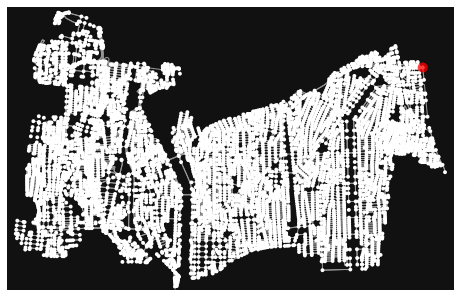

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [99]:
ox.plot_graph_route(G,route)

In [98]:
ox.plot_graph_route?